[0, 715.525, 1114.665, 1342.785, 1515.21, 1632.73, 1692.22, 1744.97, 1789.06, 1822.63, 1844.41, 1862.785, 1879.285, 1890.615, 1903.225, 1911.23, 1918.48, 1927.335, 1937.495, 1944.07, 1947.295, 1952.445, 1954.65, 1958.575, 1962.985, 1966.96, 1970.175, 1973.18, 1977.22, 1978.215, 1980.945, 1983.105, 1984.01, 1985.98, 1988.9, 1990.83, 1991.95, 1993.3, 1996.215, 1997.135, 1998.65, 1999.6, 2000.22, 2001.7, 2003.155, 2003.8, 2005.85, 2006.62, 2006.83, 2007.08, 2007.875, 2008.67, 2009.25, 2009.85, 2010.285, 2010.695, 2011.98, 2012.375, 2013.36, 2013.66, 2014.805, 2015.635, 2016.095, 2017.19, 2017.315, 2017.51, 2017.83, 2018.375, 2018.99, 2019.13, 2019.585, 2020.045, 2020.63, 2021.09, 2021.35, 2021.65, 2021.68, 2021.94, 2022.25, 2022.72, 2023.045, 2023.205, 2023.41, 2023.66, 2024.05, 2024.325, 2024.485, 2024.92, 2025.2, 2025.51, 2025.575, 2025.795, 2026.265, 2026.61, 2026.69, 2026.92, 2027.005, 2027.435, 2027.99, 2028.255, 2028.255, 2028.59, 2028.945, 2029.635, 2029.645, 2029.645, 2029.715, 20

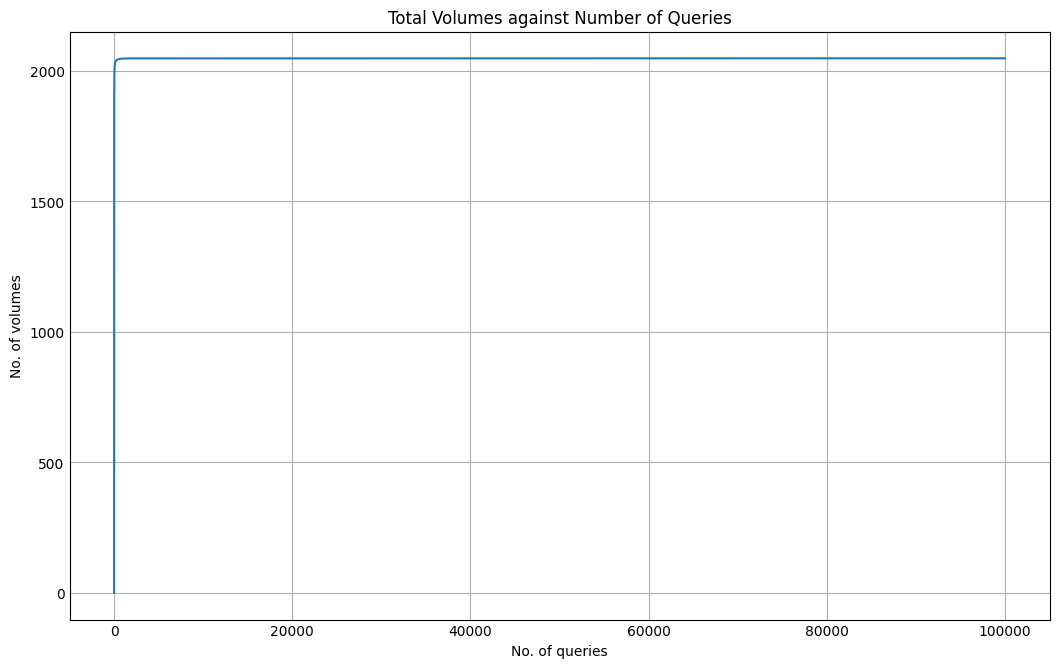

In [3]:
import random
import matplotlib.pyplot as plt

RSEmax = 2048
no_of_runs = 200
no_of_queries = 100000

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def askqry():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

max_volumes = RSEmax
def cont_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = set()
        vol_sum = 0
        for j in range(no_of_queries):
            (start_int, end_int) = askqry()
            if len(vol_tracker) >= max_volumes:
                when_max_reach = j
                for v in range(when_max_reach, no_of_queries):
                    arr[v+1] = max_volumes + arr[v+1]
                break
            else:
                for i in range(start_int, end_int+1):
                    if i not in vol_tracker:
                        vol_tracker.add(i)
                        vol_sum += 1
                arr[j+1] =  arr[j+1] + vol_sum  
    for i in range(no_of_queries):
        arr[i+1]= arr[i+1] / no_of_runs
    print(arr)
    return(arr)

arr = cont_query(no_of_runs, no_of_queries)

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()